In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('Bewerage_110.csv')

In [11]:
df['0']

0       0
1       0
2       0
3       0
4       0
       ..
2521    5
2522    5
2523    5
2524    5
2525    5
Name: 0, Length: 2526, dtype: int64

In [19]:
x = df.drop('0', axis=1) / 255.0
y= df['0']

In [ ]:
# x= x.to_numpy()
# x = x.reshape(2526,110,110,3)

In [ ]:
x.shape

(2526, 110, 110, 3)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(2020, 110, 110, 3)
(506, 110, 110, 3)
(2020,)


(2020, 36300)
Final SOM input shape: (2020, 200)


c:\Users\Cv\Desktop\fifth_sem\ANNL-5A\class_work\minisom.py:235: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +
c:\Users\Cv\Desktop\fifth_sem\ANNL-5A\class_work\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.09510587539395601


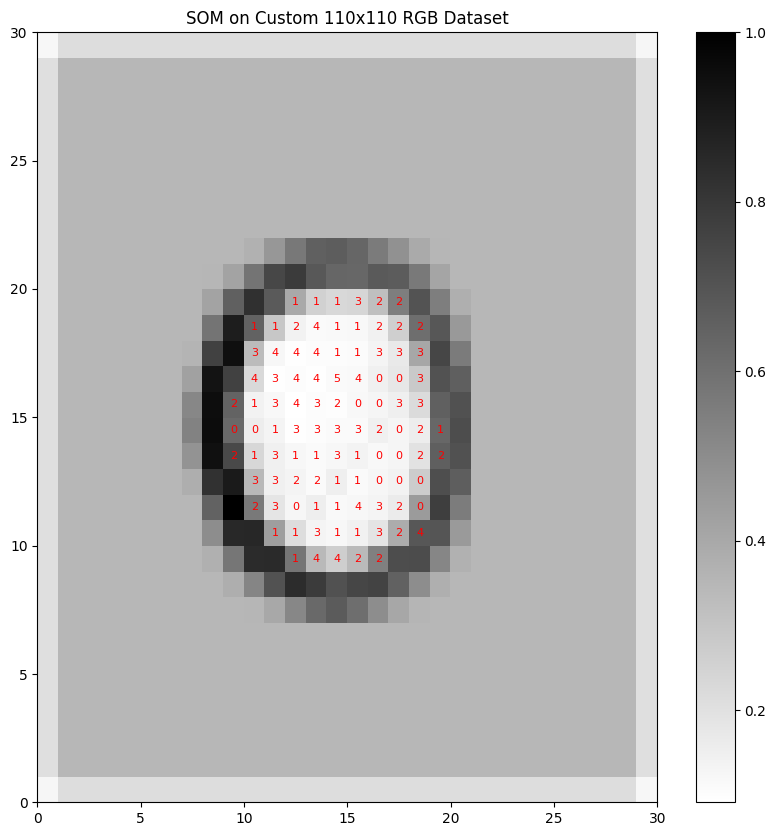

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.decomposition import PCA

# --------- Reshape & Normalize ----------
X_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32')  # (2020, 36300)
X_train_flat = X_train_flat / 255.0

print(X_train_flat.shape)  # (2020, 36300)

# --------- PCA REDUCTION (VERY IMPORTANT) ----------
pca = PCA(n_components=200)  # Reduce to 200 dimensions
X_train_pca = pca.fit_transform(X_train_flat)  # Now → (2020, 200)

print("Final SOM input shape:", X_train_pca.shape)

# --------- SOM SETUP ----------
som_width = 30
som_height = 30
input_length = X_train_pca.shape[1]  # = 200

som = MiniSom(som_width, som_height, input_length,
              sigma=1.5, learning_rate=0.5,
              neighborhood_function='triangle',
              activation_distance='euclidean',
              topology='rectangular',
              sigma_decay_function='linear_decay_to_one',
              decay_function='linear_decay_to_zero',
              random_seed=349)

# --------- TRAIN ----------
som.pca_weights_init(X_train_pca)
som.train_random(X_train_pca, 2000, verbose=2)

# --------- PLOT SOM ----------
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()

# --------- LABELS (BMU) ----------
winner_count = {}
for i, x in enumerate(X_train_pca):
    winner = som.winner(x)
    if winner not in winner_count:
        winner_count[winner] = {}
    label = y_train.iloc[i]
    winner_count[winner][label] = winner_count[winner].get(label, 0) + 1

for coord, counts in winner_count.items():
    label = max(counts, key=counts.get)
    plt.text(coord[0] + 0.5, coord[1] + 0.5, str(label), color='red',
             fontsize=8, ha='center', va='center')

plt.title('SOM on Custom 110x110 RGB Dataset')
plt.show()


Final SOM Input Shape: (2020, 200)


c:\Users\Cv\Desktop\fifth_sem\ANNL-5A\class_work\minisom.py:235: UserWarning: sigma should be an integer >=1 when triangle or bubbleare used as neighborhood function
  warn('sigma should be an integer >=1 when triangle or bubble' +
c:\Users\Cv\Desktop\fifth_sem\ANNL-5A\class_work\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.09518195972296636


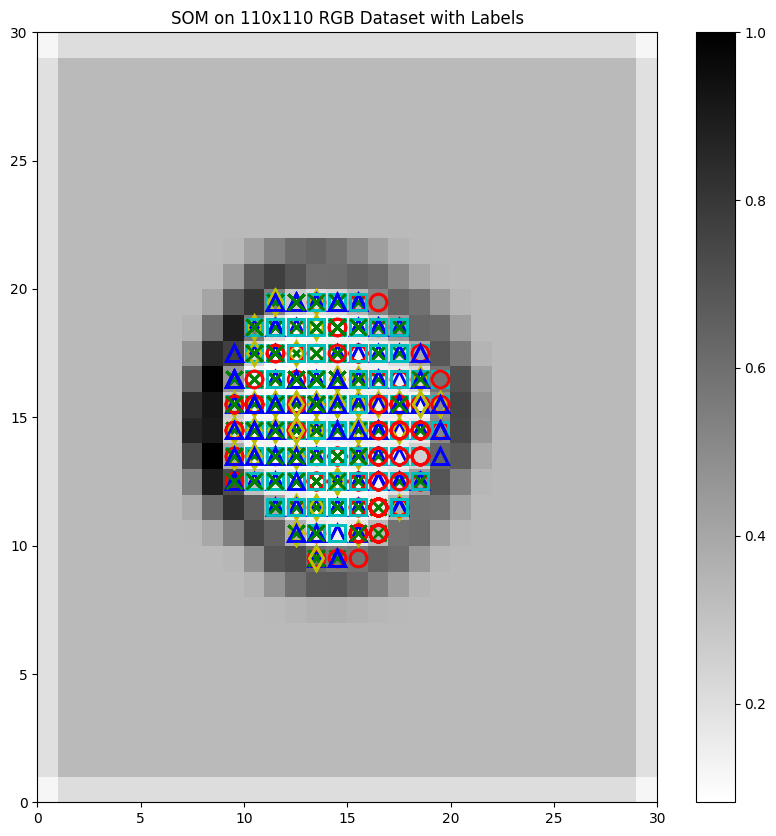

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.decomposition import PCA

# ---------- RESHAPE & NORMALIZE ----------
X_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32')  # (2020, 36300)
X_train_flat = X_train_flat / 255.0

# ---------- PCA REDUCTION ----------
pca = PCA(n_components=200)  # You can test 50, 100, 200
X_train_pca = pca.fit_transform(X_train_flat)  # Now shape → (2020, 200)

# ---------- FIX y_train (IMPORTANT) ----------
y_train = y_train.reset_index(drop=True)  # OR: y_train = np.array(y_train)

print("Final SOM Input Shape:", X_train_pca.shape)  # (2020, 200)

# ---------- SOM SETUP ----------
som_width = 30
som_height = 30
input_length = X_train_pca.shape[1]  # 200 after PCA

som = MiniSom(som_width, som_height, input_length,
              sigma=1.5, learning_rate=0.5,
              neighborhood_function='triangle',
              activation_distance='euclidean',
              topology='rectangular',
              sigma_decay_function='linear_decay_to_one',
              decay_function='linear_decay_to_zero',
              random_seed=349)

# ---------- TRAIN ----------
som.pca_weights_init(X_train_pca)
som.train_random(X_train_pca, 2000, verbose=2)

# ---------- PLOT SOM HEATMAP ----------
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='gist_yarg')
plt.colorbar()

# ---------- SOM MARKER PLOTTING ----------
markers = ['o','x','^','s','y','d','v','p','8','p']
colors  = ['r','g','b','c','m','y','k','w','r','g']

for count, datapoint in enumerate(X_train_pca):
    w = som.winner(datapoint)  # Best matching unit
    plt.plot(w[0] + 0.5, w[1] + 0.5,
             markers[y_train[count]], 
             markerfacecolor='None',
             markeredgecolor=colors[y_train[count]],
             markeredgewidth=2,
             markersize=12)

plt.title('SOM on 110x110 RGB Dataset with Labels')
plt.show()